# 45. Задача о пасущейся козе

Пример [задачи](https://en.wikipedia.org/wiki/Goat_grazing_problem) с простым условием, в которой возникает трансцендентное уравнение, а простого аналитического решения нет (найдено аналитическое решение, использующее интегралы от комплексных функций - см. ниже замечание).

Коза, привязанная за веревку в к ограде, пасется на круглом поле. Какова должна быть длина веревки, чтобы у козы был доступ ровно к половине площади всего поля? Радиус поля считается равным $1$.

Покажите, что задача сводится к решению уравнения
$$
\sin\alpha - \alpha\cos\alpha = \frac{\pi}{2}, \qquad (1)
$$
откуда можно найти длину веревки
$$
r = 2\cos\frac{\alpha}{2}.
$$

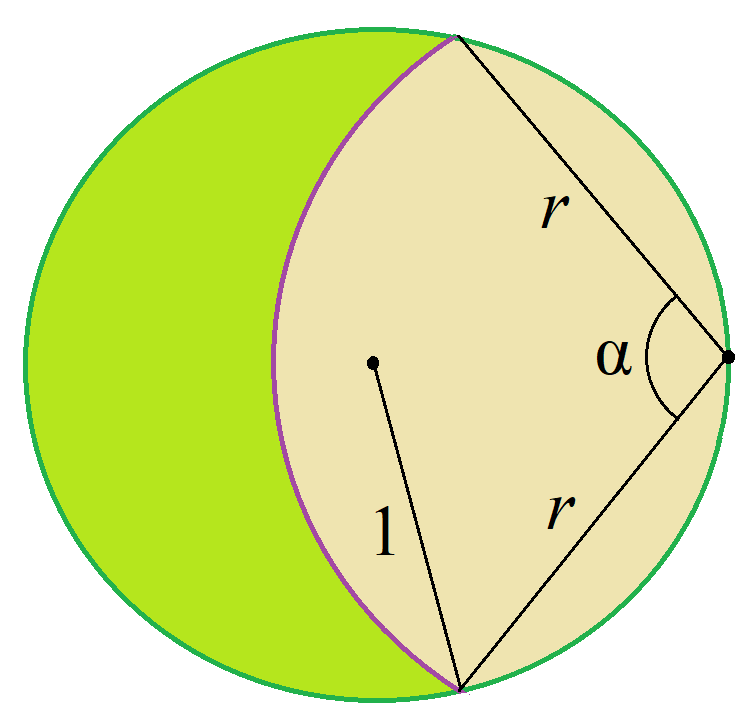

Постройте графики правой части уравнения (1). Сколько корней оно имеет? Решите уравнение (1) численно, например, методом `scipy.optimize.brentq` и найдите $r$. 

Сделайте вывод.

*Замечание.*
Решение задачи может быть выражено в замкнутой форме через интегралы от функций комплексного переменного:
$$
{\displaystyle r=2\cos \left({\frac {\displaystyle \oint\limits_C{\frac {z}{2\sin z-2z\cos z-\pi }}\,dz}{\displaystyle \oint\limits_C{\frac {2}{2\sin z-2z\cos z-\pi }}\,dz}}\right),}
$$
где $C$ -- окружность ${\displaystyle \left|z-{\frac {3\pi }{8}}\right|={\frac {\pi }{4}}}$. Воспользоваться данными формулами для вычисления числового решения будет сложнее, чем решить уравнение (1) численно.


# Решение:

![](https://4.downloader.disk.yandex.ru/preview/e3701b73be647a65cdc1037dc9efe06dbdd229d6c9aa94b8b769763f51d7961a/inf/9hGSawc4I33WyOwq-3koFnIX01CbgnQnBNZKn-i3OKRl9owzaBGqJPN99kDA5pLEJA95bXDTdOAfHDt90qFlQg%3D%3D?uid=859369724&filename=%D0%91%D0%B5%D0%B7%20%D0%B8%D0%BC%D0%B5%D0%BD%D0%B8-1.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=859369724&tknv=v2&size=1013x823)  

Пyсть зaгон представляет собой единичный круг площaдью $\pi$, с центром в точке O, коза привязaнa к зaгону в точке A. 

Зелёным цветом обозначена площадь, где пасётся коза, она равна $\frac{\pi}{2}$. 

Составим несколько уравнений по получившемуся рисунку:

Так как  ΔBAO-равнобедренный, то
$$
\alpha = \pi - 2β, \qquad (1)
$$
По теореме синусов в треугольнике ΔBAO
$$
\sinβ= \frac{\sin\alpha}{r}, \qquad (2)   
$$
По теореме косинусов в треугольнике ΔBAO
$$
r^2=1+1-2\cos\alpha=2(1-\cos\alpha), \qquad (3)
$$

$$
1=1+r^2-2r\cosβ => β=\arccos\frac{r}{2}, \qquad (4)
$$

Площадь кругового сектора ABC:
$$
S_{ABC}=\pi r^2 \frac{θ}{2\pi}=\frac{r^2 β}{2},
$$
Площадь кругового сектора OAB:
$$
S_{OAB}=\pi \frac{\alpha}{2\pi}=\frac{\alpha}{2},
$$
Площадь тругольника ΔOAB:
$$
S_{ΔOAB}=\frac{1}{2}r \sinβ,
$$
Используя $\qquad (2)$
$$
S_{ΔOAB}=\frac{1}{2} \sin\alpha\
$$
Таким образом, площадь, по которой должна ходить коза, равна
$$
S=2(S_{ABC}+S_{OAB}-S_{ΔOAB})=\frac{\pi}{2}
$$
Тогда
$$
S=r^2 β+\alpha-\sin\alpha=\frac{\pi}{2}
$$
Используя $\qquad (1)$
$$
β=\frac{1}{2}(\pi-\alpha)
$$
$$
\sin\alpha+(\pi-\alpha)\cos\alpha=\frac{\pi}{2}
$$
Таким образом задача сводится к решению уравнения
$$
\sin\alpha - \alpha\cos\alpha = \frac{\pi}{2}, \qquad (5)
$$
откуда можно найти длину веревки
$$
r = 2\cos\frac{\alpha}{2}.
$$

Уравнение (5) решим при помощи алгоритма поиска корня Ньютона-Рафсона, реализованного в Python как scipy.optimize.newton:

In [5]:
from scipy import stats

from scipy.stats import norm

import numpy as np
from scipy.optimize import newton

def func(alpha):
    return np.sin(alpha) + (np.pi - alpha) * np.cos(alpha) - np.pi / 2

theta_guess = np.pi / 2
alpha = newton(func, theta_guess)
print(alpha)

1.2358969242799094


Это значение для $\alpha$ находится в радианах. 

Соответствующая длина верёвки $r$ выводится из (3) в виде:

In [6]:
r = np.sqrt(2 * (1-np.cos(alpha)))
print(r)

1.1587284730181215


Изменение пастбищной части загона $А/\pi$ в зависимости от длины верёвки $r$ можно изобразить следующим образом:

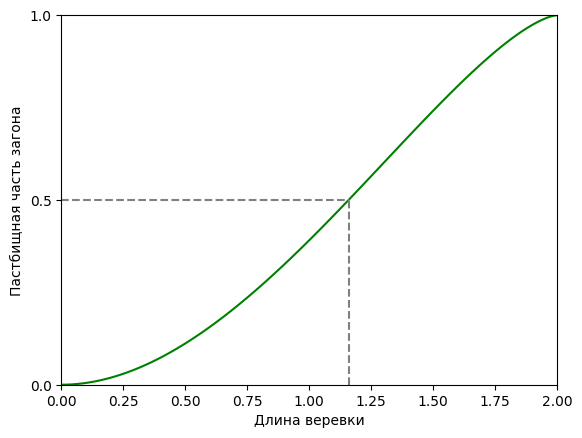

In [8]:
import matplotlib.pyplot as plt

rgrid = np.linspace(0, 2, 100)
cos_alpha = 1 - rgrid**2 / 2
alpha = np.arccos(cos_alpha)
theta = (np.pi - alpha) / 2
A = rgrid**2 * theta + alpha - np.sin(alpha)

plt.plot(rgrid, A / np.pi, color='green')
plt.hlines(0.5, 0, r, colors='grey', linestyles='--')
plt.vlines(r, 0, 0.5, colors='grey', linestyles='--')
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.yticks([0, 0.5, 1])
plt.xlabel('Длина веревки')
plt.ylabel('Пастбищная часть загона')
plt.show()